## Importações e carregamento da base de dados

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, KFold

In [14]:
import pickle
with open('./content/credit.pkl', 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [15]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [16]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [17]:
x_credit = np.concatenate((x_credit_treinamento, x_credit_teste), axis=0)
x_credit.shape

(2000, 3)

In [18]:
x_credit

array([[-1.3754462 ,  0.50631087,  0.10980934],
       [ 1.45826409, -1.6489393 , -1.21501497],
       [-0.79356829,  0.22531191, -0.43370226],
       ...,
       [ 1.37445674, -1.05746281, -1.12564819],
       [-1.57087737, -0.63488173, -0.36981671],
       [-1.03572293, -0.93978122,  0.04244312]])

In [19]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis=0)
y_credit.shape

(2000,)

In [20]:
y_credit

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

## Validação Cruzada / Cross Validation

### Árvore de Decisão

In [ ]:
resultados_arvore = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    scores = cross_val_score(arvore, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_arvore.append(scores.mean())

In [35]:
resultados_arvore

[0.986,
 0.9834999999999999,
 0.9905000000000002,
 0.9869999999999999,
 0.9879999999999999,
 0.9884999999999999,
 0.9884999999999999,
 0.9875,
 0.9870000000000001,
 0.9869999999999999,
 0.9865,
 0.9899999999999999,
 0.9889999999999999,
 0.9864999999999998,
 0.9855,
 0.9864999999999998,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.983,
 0.9870000000000001,
 0.9889999999999999,
 0.9875,
 0.9880000000000001,
 0.9880000000000001,
 0.9875,
 0.986,
 0.9864999999999998,
 0.9880000000000001]

### Random Forest

In [34]:
resultados_random_forest = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    scores = cross_val_score(random_forest, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_random_forest.append(scores.mean())

In [ ]:
resultados_random_forest

### kNN

In [33]:
resultados_knn = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    knn = KNeighborsClassifier()
    scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_knn.append(scores.mean())

In [ ]:
resultados_knn

### Logistic Regression / Regressão Logística

In [32]:
resultados_logistic_regression = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    logistic_regression = LogisticRegression(C = 1.0, solver='lbfgs', tol=0.0001)
    scores = cross_val_score(logistic_regression, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_logistic_regression.append(scores.mean())

In [ ]:
resultados_logistic_regression

### SVM (Support Vector Machine)

In [ ]:
resultados_svm = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    svm = SVC(kernel='rbf', C=2.0)
    scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_svm.append(scores.mean())

In [ ]:
resultados_svm

### Neural Network / Redes Neurais

In [ ]:
resultados_neural = []

for i in range(30):
    kfold = KFold( n_splits=10, shuffle=True, random_state=i)

    neural = MLPClassifier(activation='relu',  batch_size=56, solver='adam')
    scores = cross_val_score(neural, x_credit, y_credit, cv=kfold)
    # print(scores)
    # print(scores.mean())
    resultados_neural.append(scores.mean())

In [36]:
resultados_neural

[0.9970000000000001,
 0.9984999999999999,
 0.9964999999999999,
 0.9969999999999999,
 0.9974999999999999,
 0.9970000000000001,
 0.9964999999999999,
 0.9970000000000001,
 0.9969999999999999,
 0.9975000000000002,
 0.9959999999999999,
 0.9974999999999999,
 0.9964999999999999,
 0.9974999999999999,
 0.9964999999999999,
 0.998,
 0.9970000000000001,
 0.9975000000000002,
 0.9969999999999999,
 0.9969999999999999,
 0.9974999999999999,
 0.9969999999999999,
 0.9974999999999999,
 0.9974999999999999,
 0.9970000000000001,
 0.9974999999999999,
 0.9970000000000001,
 0.9970000000000001,
 0.9970000000000001,
 0.9970000000000001]

## Análise dos resultados

In [38]:
resultados = pd.DataFrame({
    'Arvore': resultados_arvore, 
    'Random Forest': resultados_random_forest, 
    'KNN': resultados_knn, 
    'Regressão Logística': resultados_logistic_regression, 
    'SVM': resultados_svm, 
    'Rede Neural': resultados_neural
    })
resultados

,Arvore,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
0,0.9860,0.9835,0.9815,0.9475,0.9845,0.9970
1,0.9835,0.9830,0.9800,0.9465,0.9840,0.9985
2,0.9905,0.9855,0.9795,0.9470,0.9865,0.9965
3,0.9870,0.9815,0.9780,0.9460,0.9850,0.9970
4,0.9880,0.9880,0.9820,0.9465,0.9850,0.9975
5,0.9885,0.9815,0.9780,0.9465,0.9845,0.9970
6,0.9885,0.9835,0.9805,0.9470,0.9860,0.9965
7,0.9875,0.9815,0.9800,0.9480,0.9850,0.9970
8,0.9870,0.9835,0.9795,0.9465,0.9840,0.9970
9,0.9870,0.9855,0.9820,0.9465,0.9845,0.9975


In [39]:
resultados.describe()

,Arvore,Random Forest,KNN,Regressão Logística,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987283,0.983567,0.980050,0.947000,0.985083,0.997133
std,0.001705,0.001960,0.001533,0.000743,0.001280,0.000490
min,0.983000,0.980500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.982500,0.979000,0.946500,0.984125,0.997000
50%,0.987250,0.983500,0.980000,0.947000,0.985000,0.997000
75%,0.988000,0.984875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.988000,0.982500,0.948500,0.987500,0.998500


In [ ]:
# Coeficiente de variação
(resultados.std() / resultados.mean()) * 100

Arvore                 0.172735
Random Forest          0.199239
KNN                    0.156446
Regressão Logística    0.078435
SVM                    0.129977
Rede Neural            0.049154
dtype: float64

### Testes Estatísticos - teste de normalidade nos resultados (Shapiro)

In [42]:
from scipy.stats import shapiro

In [ ]:
# Se o valor de p for menor que alpha, a distribuição não é normal (indica que aceitamos a hipótese nula - H0)
alpha = 0.05

shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistic_regression), shapiro(resultados_svm), shapiro(resultados_neural)

(ShapiroResult(statistic=0.9557879327104234, pvalue=0.24087064320049617),
 ShapiroResult(statistic=0.956237747612653, pvalue=0.24750568456000138),
 ShapiroResult(statistic=0.9584024823930501, pvalue=0.2818135378764127),
 ShapiroResult(statistic=0.9309147727892649, pvalue=0.051930740130906254),
 ShapiroResult(statistic=0.9622985607506823, pvalue=0.3541579284945434),
 ShapiroResult(statistic=0.8926955195968679, pvalue=0.005592103973830425))

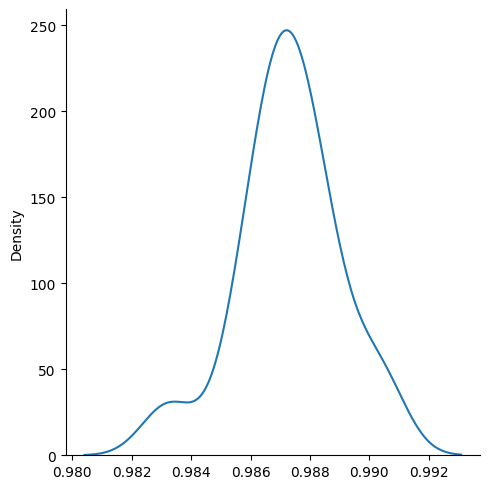

In [49]:
sns.displot(resultados_arvore, kind='kde')

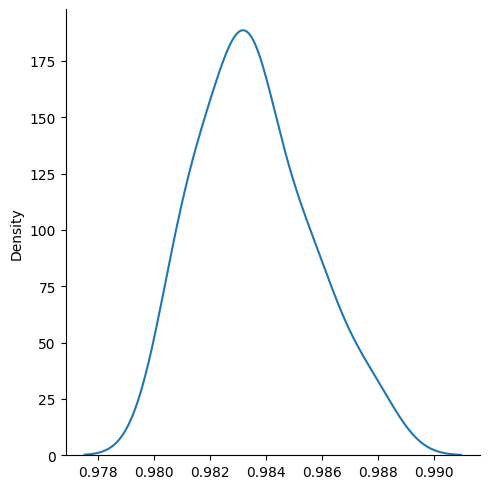

In [50]:
sns.displot(resultados_random_forest, kind='kde')

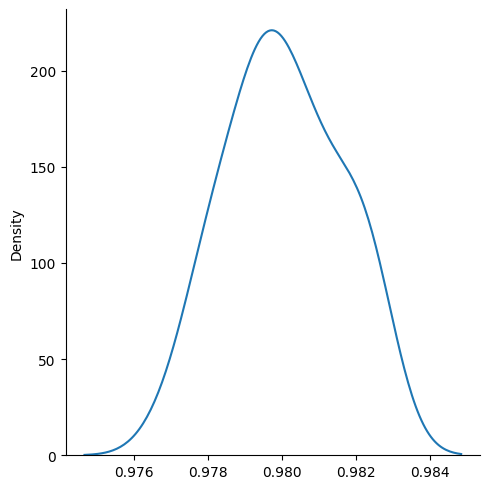

In [51]:
sns.displot(resultados_knn, kind='kde')

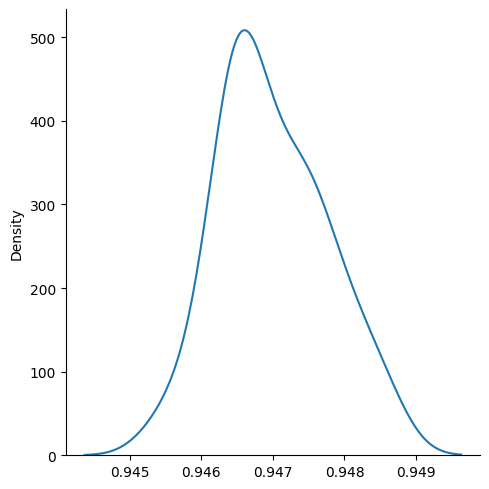

In [52]:
sns.displot(resultados_logistic_regression, kind='kde')

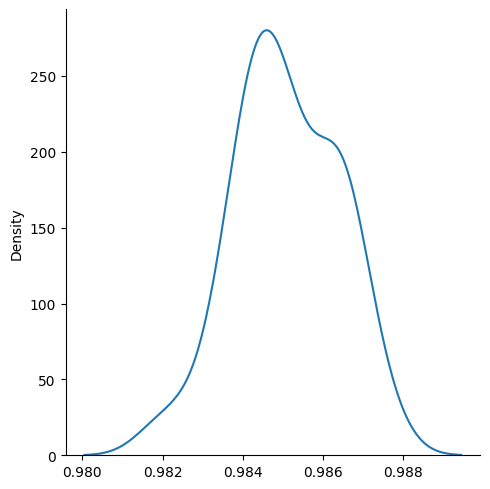

In [53]:
sns.displot(resultados_svm, kind='kde')

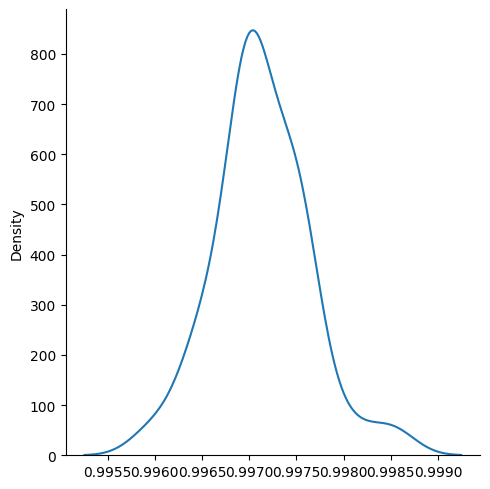

In [54]:
sns.displot(resultados_neural, kind='kde')

### Análise de variação - ANOVA e Tukey

In [55]:
from scipy.stats import f_oneway

In [ ]:
alpha = 0.05

_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistic_regression, resultados_svm, resultados_neural)
p

8.765303320567124e-183

In [57]:
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes.')
else:
    print('Hipótese alternativa rejeitada. Dados são iguais.')

Hipótese nula rejeitada. Dados são diferentes.


In [58]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistic_regression, resultados_svm, resultados_neural]),
                         'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural','rede_neural']}

In [61]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df

,accuracy,algoritmo
0,0.9860,arvore
1,0.9835,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9880,arvore
...,...,...
175,0.9975,rede_neural
176,0.9970,rede_neural
177,0.9970,rede_neural
178,0.9970,rede_neural


In [65]:
from statsmodels.stats.multicomp import MultiComparison

In [66]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [69]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0072    0.0 -0.0083 -0.0062   True
       arvore     logistica  -0.0403    0.0 -0.0413 -0.0393   True
       arvore random_forest  -0.0037    0.0 -0.0047 -0.0027   True
       arvore   rede_neural   0.0098    0.0  0.0088  0.0109   True
       arvore           svm  -0.0022    0.0 -0.0032 -0.0012   True
          knn     logistica   -0.033    0.0 -0.0341  -0.032   True
          knn random_forest   0.0035    0.0  0.0025  0.0045   True
          knn   rede_neural   0.0171    0.0  0.0161  0.0181   True
          knn           svm    0.005    0.0   0.004  0.0061   True
    logistica random_forest   0.0366    0.0  0.0355  0.0376   True
    logistica   rede_neural   0.0501    0.0  0.0491  0.0512   True
    logistica           svm   0.0381    0.0  0.0371  0.0391   

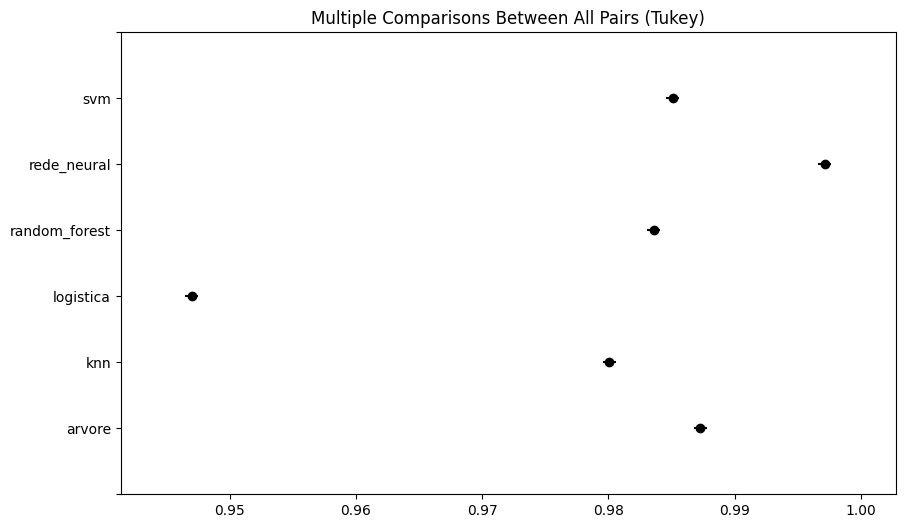

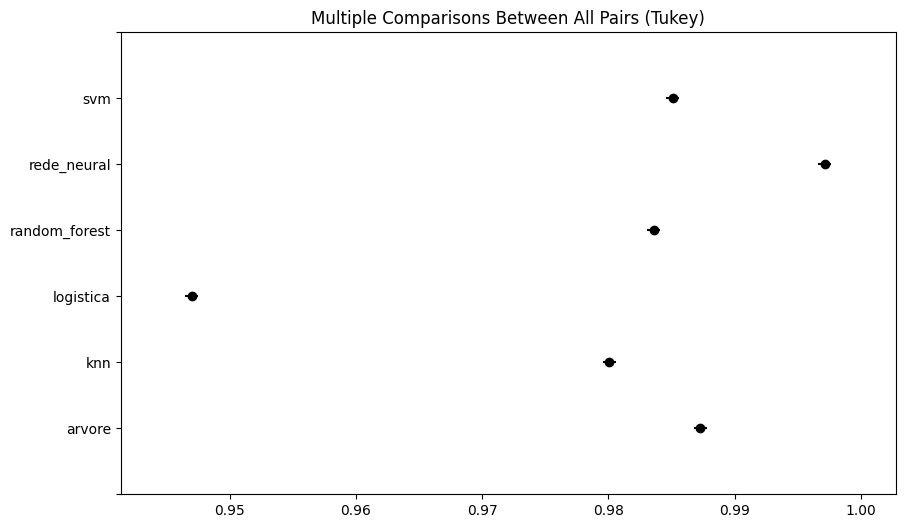

In [72]:
teste_estatistico.plot_simultaneous()